[1️] Prepare Data for Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file
df = pd.read_csv("Sales.csv")

In [3]:
# Print DataFrame
print(df)

           Date        Time State     Group  Unit  Sales
0     01-Oct-20     Morning    WA      Kids     8  20000
1     01-Oct-20     Morning    WA       Men     8  20000
2     01-Oct-20     Morning    WA     Women     4  10000
3     01-Oct-20     Morning    WA   Seniors    15  37500
4     01-Oct-20   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555  30-Dec-20   Afternoon    TX   Seniors    14  35000
7556  30-Dec-20     Evening    TX      Kids    15  37500
7557  30-Dec-20     Evening    TX       Men    15  37500
7558  30-Dec-20     Evening    TX     Women    11  27500
7559  30-Dec-20     Evening    TX   Seniors    13  32500

[7560 rows x 6 columns]


In [4]:
# Check dimensions
print("Shape of data:", df.shape)

Shape of data: (7560, 6)


In [5]:
# Check missing values
print(df.isnull().sum())

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


[2] Normalize Data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create new DataFrame with only numeric columns
df_dataonly = df[['Unit', 'Sales']]

# Create normalize object
scaler = MinMaxScaler()

# Fit and transform
normalize_data = scaler.fit_transform(df_dataonly)

# Convert to DataFrame
normalize_df = pd.DataFrame(normalize_data, columns=['Unit','Sales'])

# Check min and max
print(normalize_df.min())
print(normalize_df.max())

Unit     0.0
Sales    0.0
dtype: float64
Unit     1.0
Sales    1.0
dtype: float64


[3] Visualize Overall Trends

C:\Users\akash\AppData\Local\Temp\ipykernel_22216\1192357269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


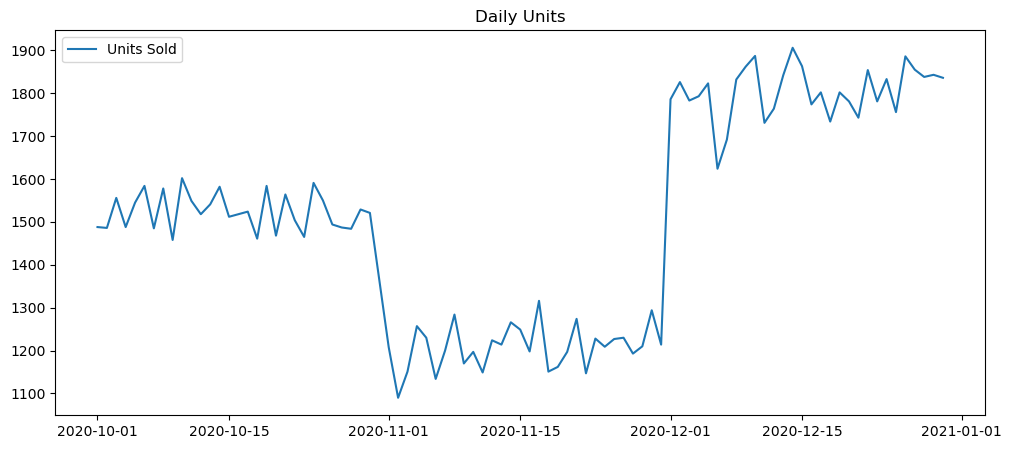

In [7]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date
daily_data = df.groupby('Date').sum()

# Plot
plt.figure(figsize=(12,5))
plt.plot(daily_data.index, daily_data['Unit'], label='Units Sold')
plt.legend()                   # Shows label in graph. (Show Legend)
plt.title("Daily Units")       # add title
plt.show()       

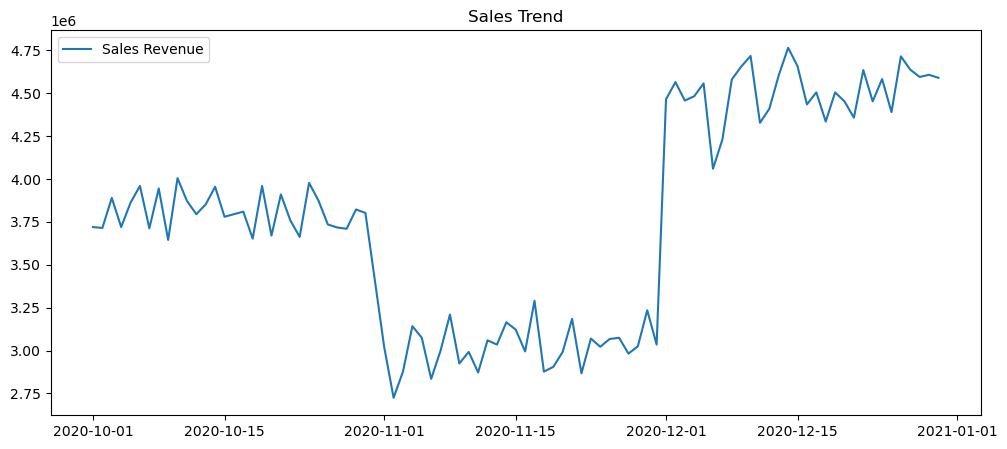

In [8]:
plt.figure(figsize=(12,5))
plt.plot(daily_data.index, daily_data['Sales'], label='Sales Revenue')
plt.legend()
plt.title("Sales Trend")
plt.show()

[4] Monthly Data Analysis

In [9]:
# Created an index on the 'Date' column
df = df.set_index('Date')   
df_oct = df.loc['2020-10']
df_nov = df.loc['2020-11']
df_dec = df.loc['2020-12']

[5] Describe Data

In [10]:
print("Overall Data Description")
print(df.describe())

Overall Data Description
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000


In [11]:
print("October")
print(df_oct.describe())

October
              Unit          Sales
count  2520.000000    2520.000000
mean     18.141270   45353.174603
std      11.944521   29861.302213
min       3.000000    7500.000000
25%       9.000000   22500.000000
50%      14.000000   35000.000000
75%      27.000000   67500.000000
max      50.000000  125000.000000


In [12]:
print("November")
print(df_nov.describe())

November
              Unit          Sales
count  2520.000000    2520.000000
mean     14.394048   35985.119048
std      10.946470   27366.175823
min       2.000000    5000.000000
25%       6.000000   15000.000000
50%      10.000000   25000.000000
75%      22.000000   55000.000000
max      45.000000  112500.000000


In [13]:
print("December")
print(df_dec.describe())

December
              Unit          Sales
count  2520.000000    2520.000000
mean     21.480952   53702.380952
std      14.554181   36385.451298
min       5.000000   12500.000000
25%      10.000000   25000.000000
50%      15.000000   37500.000000
75%      31.000000   77500.000000
max      65.000000  162500.000000


[6] Unit & Sales Analysis (Boxplots)

C:\Users\akash\AppData\Local\Temp\ipykernel_22216\1107455097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oct['Month'] = 'October'
C:\Users\akash\AppData\Local\Temp\ipykernel_22216\1107455097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['Month'] = 'November'
C:\Users\akash\AppData\Local\Temp\ipykernel_22216\1107455097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Text(0.5, 1.0, 'Units Sold Distribution')

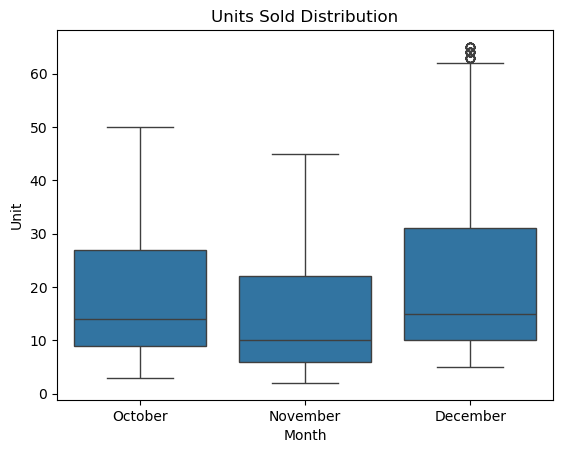

In [14]:
# add month column
df_oct['Month'] = 'October'
df_nov['Month'] = 'November'
df_dec['Month'] = 'December'

# combine all months
final_df = pd.concat([df_oct, df_nov, df_dec])

# boxplot
sns.boxplot(x='Month', y='Unit', data=final_df)
plt.title("Units Sold Distribution")

Text(0.5, 1.0, 'Sales Revenue Distribution')

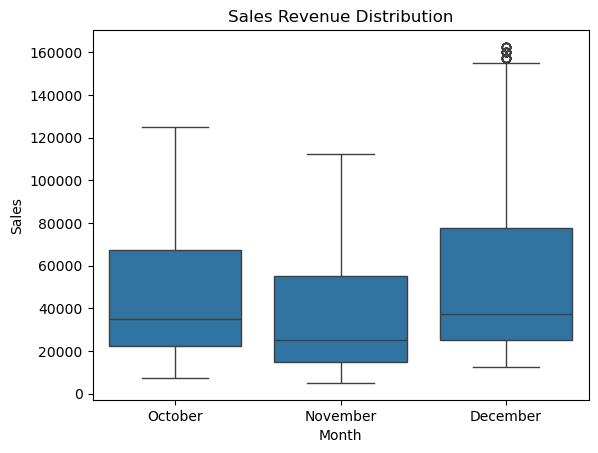

In [15]:
sns.boxplot(x='Month', y= 'Sales', data=final_df)
plt.title("Sales Revenue Distribution")

[7] Monthly Comparison

In [16]:
# Overall Totals
total_units = df['Unit'].sum()
total_sales = df['Sales'].sum()

print("Total Units (Quarter):", total_units)
print("Total Sales (Quarter):", total_sales)

Total Units (Quarter): 136121
Total Sales (Quarter): 340302500


In [17]:
# Units Sold in October, November, December
oct_units = df_oct['Unit'].sum()
nov_units = df_nov['Unit'].sum()
dec_units = df_dec['Unit'].sum()
print(oct_units, nov_units, dec_units)

45716 36273 54132


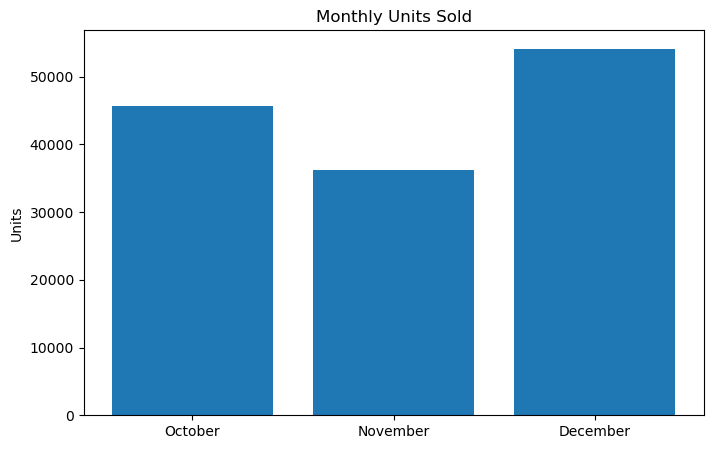

In [18]:
# plot
plt.figure(figsize=(8,5))
plt.bar(['October','November','December'],
        [oct_units, nov_units, dec_units])
plt.title("Monthly Units Sold")
plt.ylabel("Units")
plt.show()

In [19]:
# Sales Numbers for October, November, December
oct_sales = df_oct['Sales'].sum()
nov_sales = df_nov['Sales'].sum()
dec_sales = df_dec['Sales'].sum()
print(oct_sales, nov_sales, dec_sales)

114290000 90682500 135330000


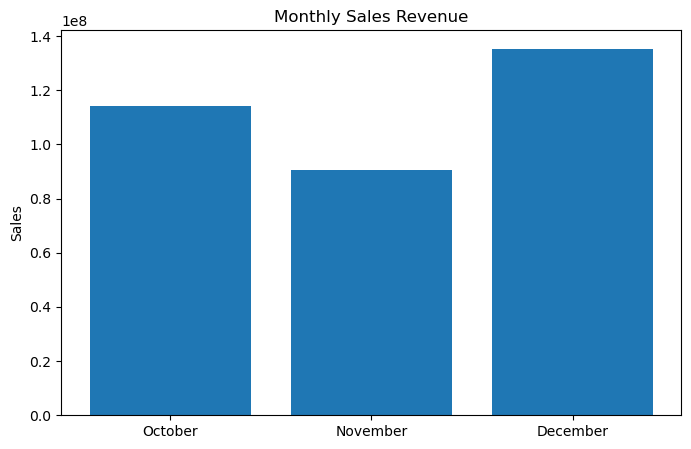

In [20]:
# plot
plt.figure(figsize=(8,5))
plt.bar(['October','November','December'],
        [oct_sales, nov_sales, dec_sales])
plt.title("Monthly Sales Revenue")
plt.ylabel("Sales")
plt.show()

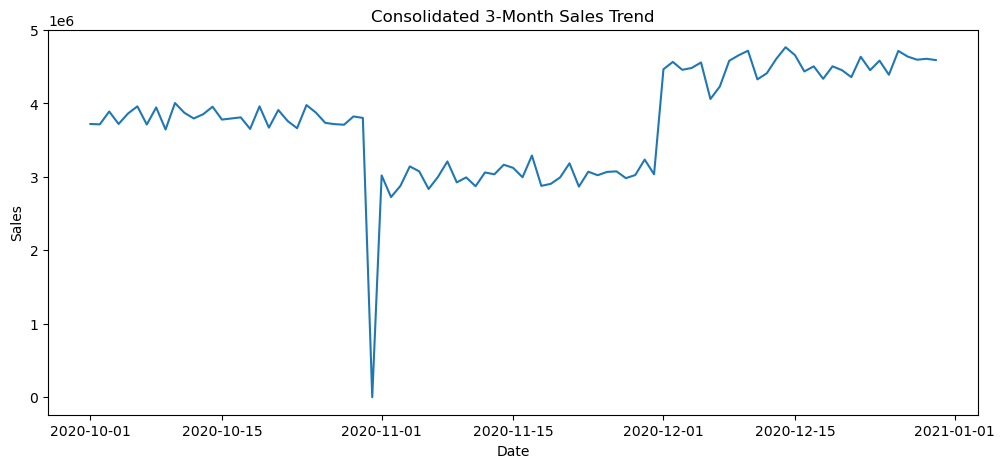

In [21]:
# Consolidated 3-Month Sales Plot
# Daily Sales Trend (Full Quarter)
daily_sales = df.resample('D').sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales['Sales'])
plt.title("Consolidated 3-Month Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

[8] Statewise Sales Analysis

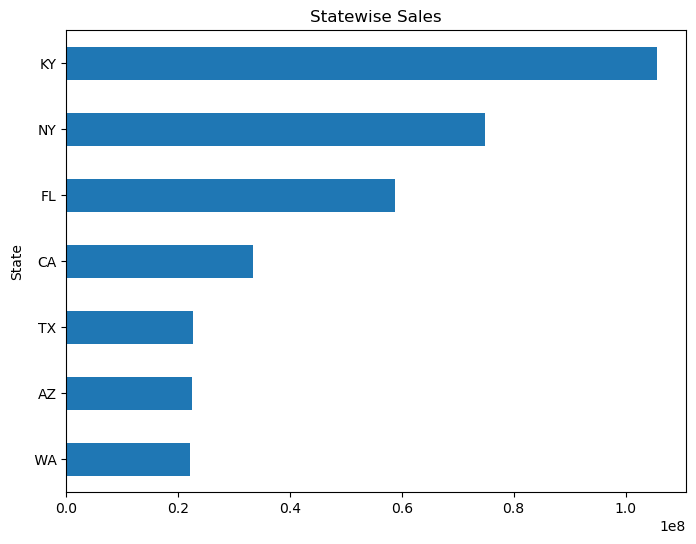

In [22]:
state_sales = df.groupby('State').sum()
state_sales['Sales'].sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Statewise Sales")
plt.show()

[9] Groupwise Analysis

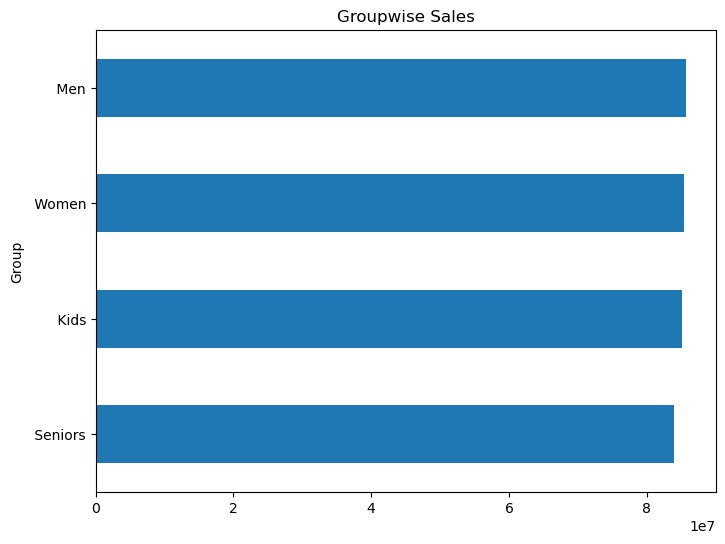

In [23]:
group_analysis = df.groupby('Group').sum()
group_analysis['Sales'].sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Groupwise Sales")
plt.show()

[10] Timewise Analysis

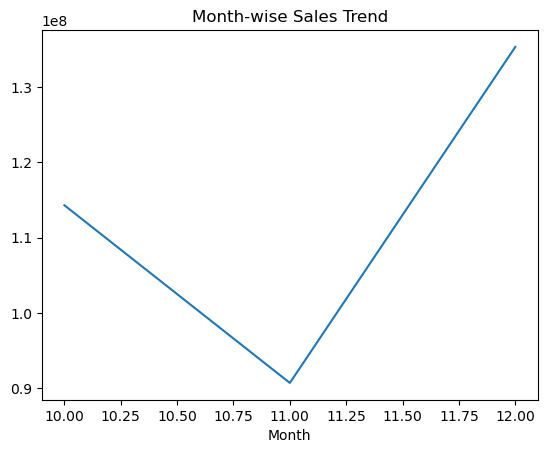

In [24]:
df['Month'] = df.index.month
df.groupby('Month').sum()['Sales'].plot(kind='line')
plt.title("Month-wise Sales Trend")
plt.show()             